In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
from google.colab.patches import cv2_imshow
import cv2

Below loop iterativelly finds a pixel with the red channel value greater than 24 and recudes RGB channels values to zero, otherwise, increases RGB values to maximum 255. This is needed to create a contrast.

In [38]:
imgs = [cv2.imread('/content/gdrive/My Drive/Homework 1/PA1_problem1_images/image{}.png'.format(i), cv2.IMREAD_UNCHANGED) for i in range(1, 6)]

for img in imgs:
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i, j, 2] > 24:
        img[i, j, 0] = 0
        img[i, j, 1] = 0
        img[i, j, 2] = 0
      else:
        img[i, j, 0] = 255
        img[i, j, 1] = 255
        img[i, j, 2] = 255

In the output, we can clearly see digits hidden in images 1, 2, 3, 4, 5. There are 7, 4, 3, 8, and 9 respectivelly

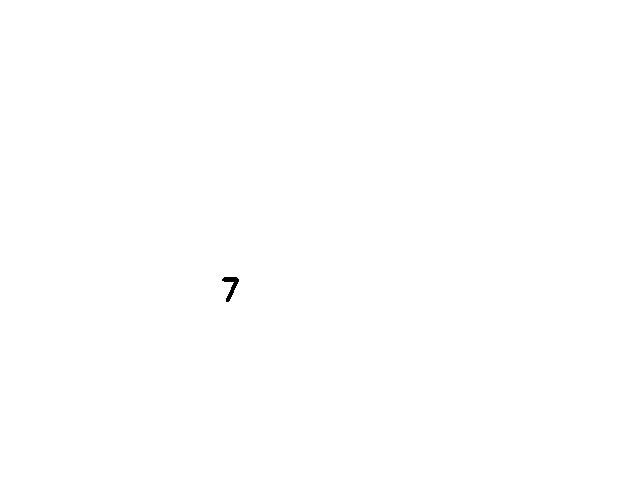

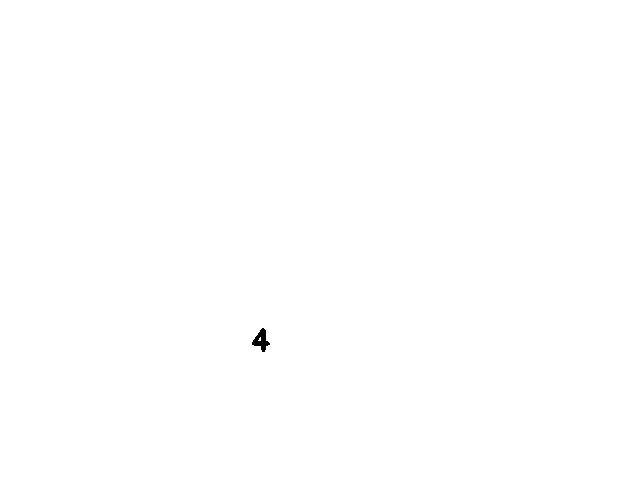

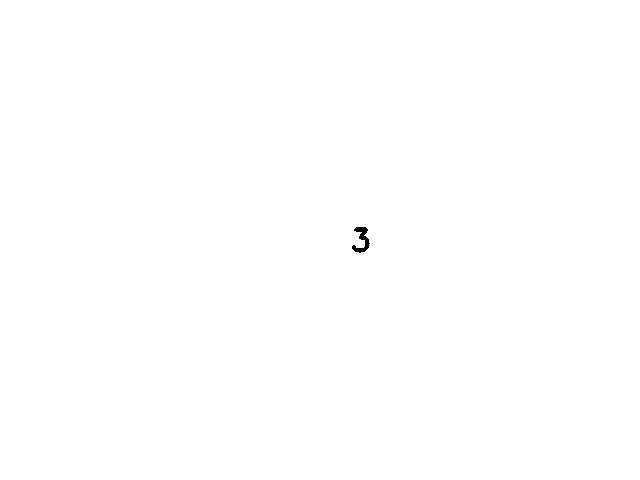

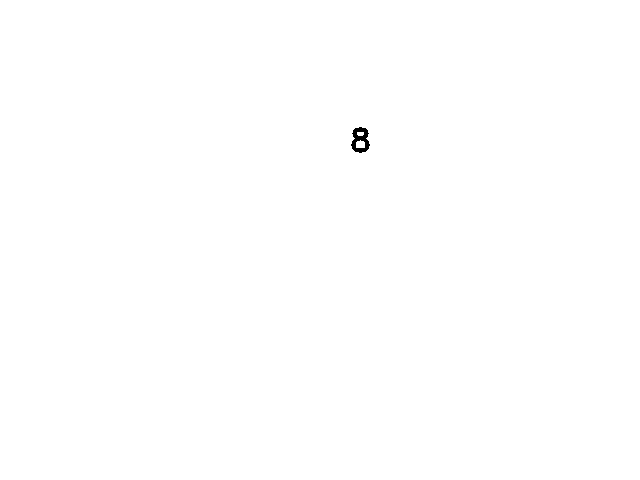

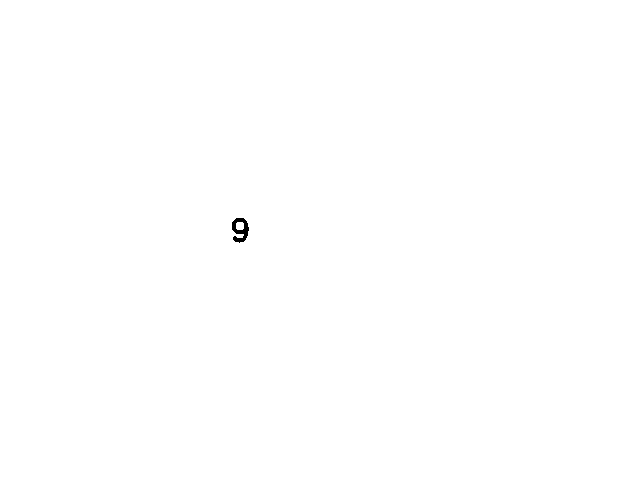

In [53]:
for img in imgs:
  cv2_imshow(img)

Below code finds locations of digits in images

In [49]:
trunc_images = []
for img in imgs:
  cor = [img.shape[0], 0, img.shape[1], 0]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i, j, 2] == 0:
        if cor[0] > i:
          cor[0] = i
        if cor[1] < i:
          cor[1] = i
        if cor[2] > j:
          cor[2] = j
        if cor[3] < j:
          cor[3] = j
  trunc_images.append(img[cor[0]:cor[1] + 1, cor[2]:cor[3] + 1])

We truncarted images to represent digits themselves

In [51]:
for img in trunc_images:
  cv2_imshow(img)